# BASICS 01 - Spatiotemporal Surfaces

In [11]:
%load_ext autoreload
%autoreload 2
%cd '../HOTS'
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/INT/grimaldi.a/Documents/projets/HOTS/newhots/HOTS


In [12]:
import numpy as np

from TimeSurface import timesurface
from Network_barrel import LoadFromMat

datapath = "../Data/alphabet_ExtractedStabilized.mat"

# Loading the events

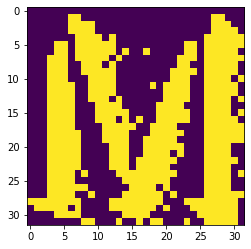

In [13]:
import matplotlib.pyplot as plt
sensor_size = [32,32]
stop_indice = 20000

add, t, p, polz = LoadFromMat(datapath,image_number=15)
t_scaled = np.array(t*1e6, dtype='int')

pixgridON = np.zeros([sensor_size[0], sensor_size[1]])
pixgridOFF = np.zeros([sensor_size[0], sensor_size[1]])
for i in range(stop_indice):
    if p[i]==1:
        pixgridON[add[i,0],add[i,1]]=1
    else: 
        pixgridOFF[add[i,0],add[i,1]]=1
plt.imshow(pixgridON);

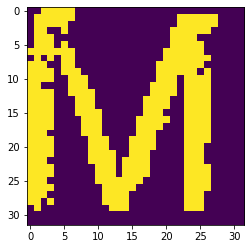

In [14]:
plt.imshow(pixgridOFF);

# Creating the SpatioTemporal Surface

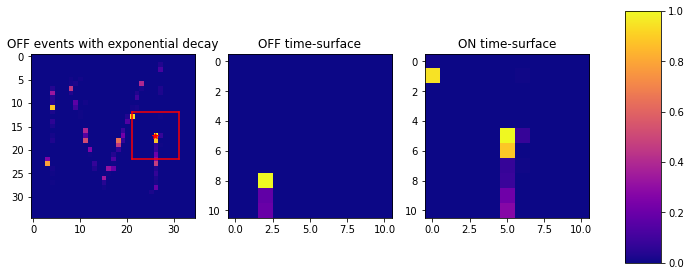

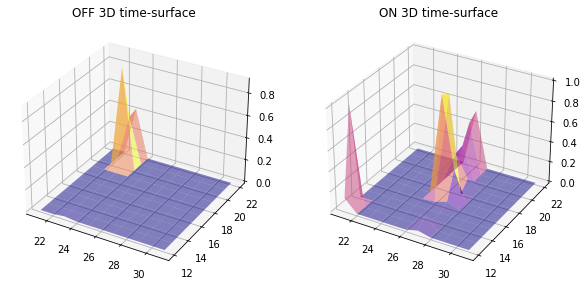

In [15]:
target_event = stop_indice
R, tau, camsize, nbpol, sigma, decay = 5, 2e2, [34,34], 2, 1, 'exponential'
SpTe = timesurface(R, tau, camsize, nbpol, sigma, decay)
i = 0
while i<target_event+1:
    P = np.zeros([nbpol])
    x, y, t, P[p[i]] = add[i,1],add[i,0],t_scaled[i], 1
    TS = SpTe.addevent(x, y, t, P)
    i+=1
    
SpTe.plote()

SpTe.plot3D()

## Testing a bigger $\tau$

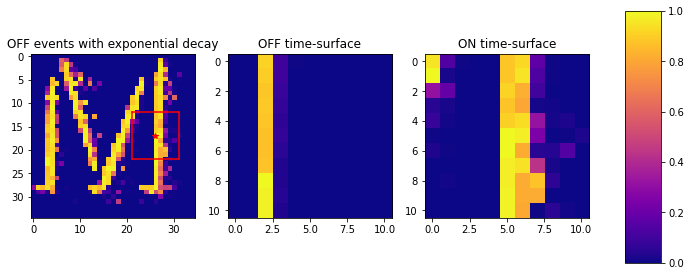

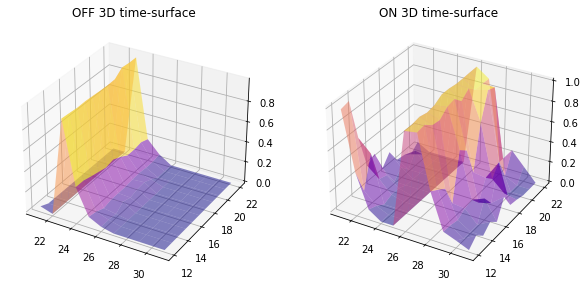

In [16]:
tau = 2e4
SpTe2 = timesurface(R, tau, camsize, nbpol, sigma, decay)
i = 0
while i<target_event+1:
    P = np.zeros([nbpol])
    x, y, t, P[p[i]] = add[i,1],add[i,0],t_scaled[i], 1
    TS = SpTe2.addevent(x, y, t, P)
    i+=1
    
SpTe2.plote()

SpTe2.plot3D()

# With tonic

In [21]:
import tonic
transform = tonic.transforms.Compose([tonic.transforms.ToTimesurface(sensor_size=tonic.datasets.POKERDVS.sensor_size, tau=2e3, decay='exp')])
learningset = tonic.datasets.NMNIST(save_to='../Data/',
                                train=True,
                                transform=transform)

  0%|          | 0/1181572961 [00:00<?, ?it/s]

Extracting ../Data/NMNIST/nmnist-archive.zip to ../Data/NMNIST


In [22]:
import torch
loader = torch.utils.data.DataLoader(learningset, shuffle=True)

In [23]:
time_surface, target = next(iter(loader))

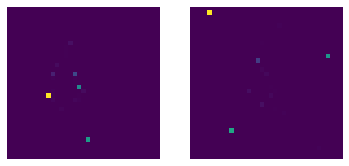

In [24]:
target_event = min(time_surface.shape[1]-1, stop_indice)

fig, axes = plt.subplots(1, time_surface.shape[2])
i = 0
for axis in axes:
    axis.imshow(time_surface.squeeze()[target_event,i,:,:])
    axis.axis("off")
    i+=1